# Agenda
- Types of Regression
  - Linear Regression
    - Simple Linear Regression
      - Train Test Split
    - Multiple Linear Regression
      - Overfitting and Underfitting
  - Non Linear Regression
    - Polynomial Regression
- Model Evalution and Validation
  - Performance Metrics for Regression
    - Mean Squared Error (MSE)
    - Root Mean Squared Error (RMSE)
    - Mean Absolute Error (MAE)
    - R- Squared (R2)
  - Cross Validation Techniques
- Regularization Techniques
  - Lasso Regression (L1 Regularization)
  - Ridge Regression (L2 Regularization)
- Hyperparameter Tuning
  - Grid Search CV
- Sklearn Pipelines

# Types of  Regression
There are 2 types of Linear Regression
- Simple Linear Regression
- Multiple Linear Regression
  - Polynomial Regression


### __Simple Linear Regression__ ###
**Simple Linear Regression**

Definition: Simple linear regression models the relationship between one independent variable and the dependent variable as a straight line.
The equation for Simple Linear Regression is:
 $$ y = \beta_0 + \beta_1x $$
where:
- $y$ is the dependent variable
- $x$ is the independent variable
- $β_0$ is the intercept
- $β_1$ is the slope

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson04_Regression/updates/Simple_linear_regression.jpg)


### __3.4.2 Multiple Linear Regression__ 
**Multiple Linear Regression**

Definition: Multiple linear regression models the relationship between two or more independent variables/predictors/features and the dependent variable as a straight line.
The equation for Multiple Linear Regression:
 $$ {y} = \beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots + \beta_px_ p $$
- $ x_1, x_2, \ldots, x_p $ are the predictor variables,
- $ \beta_1, \beta_2, \ldots, \beta_p $ are the coefficients for each predictor.
- $ \beta_0$ is the intercept 

In [1]:
## Slope - it is the change in y axis values for a unit change in x axis values
## Intercept - The value at y axis when the value of x axis is '0'

Let us now implement Simple Linear Regression

In [2]:
## import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the dataset & display first five rows

df =  pd.read_csv('tvmarketing.csv')
df.head()


,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [4]:
# Display DataFrame summary
print(df.info())
# display Statistical Summary
print(df.describe())
# check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB
None
               TV       Sales
count  200.000000  200.000000
mean   147.042500   14.022500
std     85.854236    5.217457
min      0.700000    1.600000
25%     74.375000   10.375000
50%    149.750000   12.900000
75%    218.825000   17.400000
max    296.400000   27.000000
TV       0
Sales    0
dtype: int64


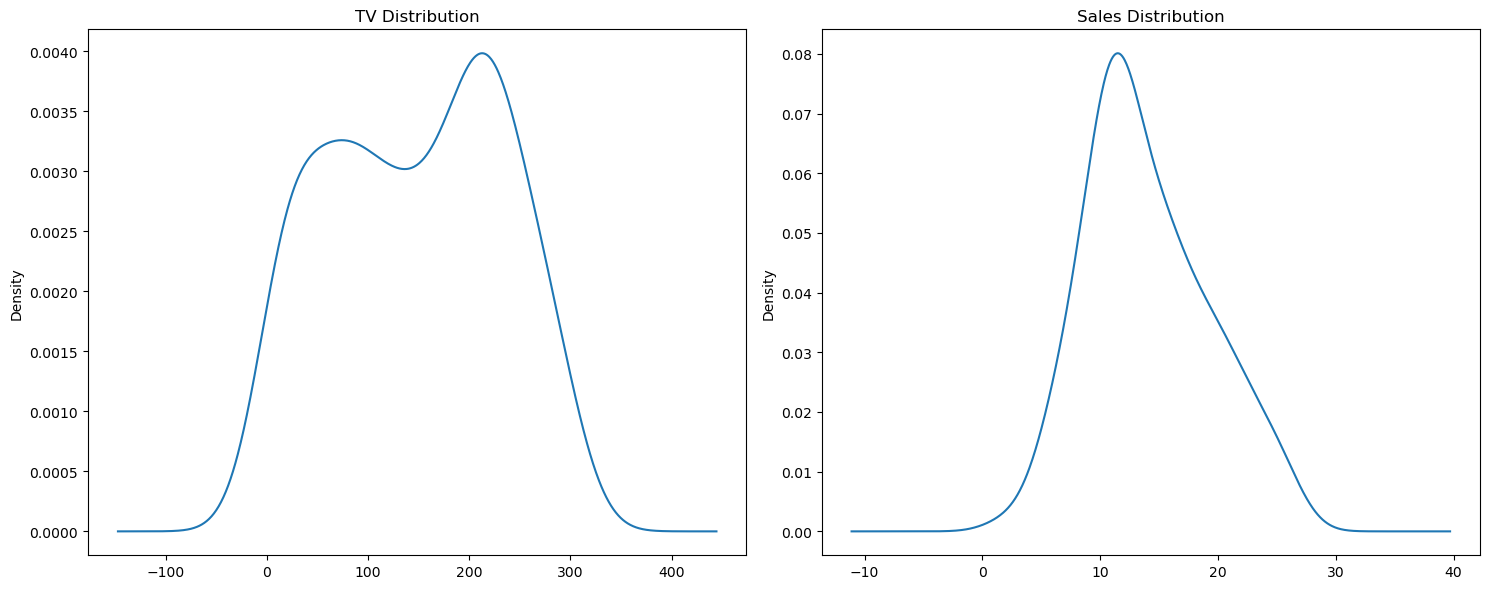

In [5]:
# Plot the distribition of input feature  and Target
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
df['TV'].plot.kde()
plt.title('TV Distribution')
plt.subplot(1,2,2)
df['Sales'].plot.kde()
plt.title('Sales Distribution')
plt.tight_layout()
plt.show()


#### Fit The Regression model
- Define what are the features and target
- Split the data for traininf and testing

In [6]:
# Extract the Feature(s) from the dataframe as dataframe(2 dimensional entity)
X = df.iloc[:, :-1]
# Extract the target from the dataframe as Series(1 dimensional entity)
y = df.iloc[:, -1]

In [7]:
# install sci kit learn
#!pip install scikit-learn
# to upgrade 
#!pip install --upgrade  scikit-learn

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =  42)

In [10]:
print(X_test.index)

Index([ 95,  15,  30, 158, 128, 115,  69, 170, 174,  45,  66, 182, 165,  78,
       186, 177,  56, 152,  82,  68, 124,  16, 148,  93,  65,  60,  84,  67,
       125, 132,   9,  18,  55,  75, 150, 104, 135, 137, 164,  76],
      dtype='int64')


In [11]:
# Let us train the model
# import model from sklearn
from sklearn.linear_model import LinearRegression

# instantiate the model
lin_reg =  LinearRegression()



In [12]:
lin_reg

LinearRegression()

In [13]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [14]:
# print the learned parameters, i.e slope(coefficient of regression, intercept)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[0.04652973]
7.1196384305929525


In [40]:
# use X_test data as input to learnt model 'lin_reg' to get predicted values for X_test
y_pred_test = lin_reg.predict(X_test)

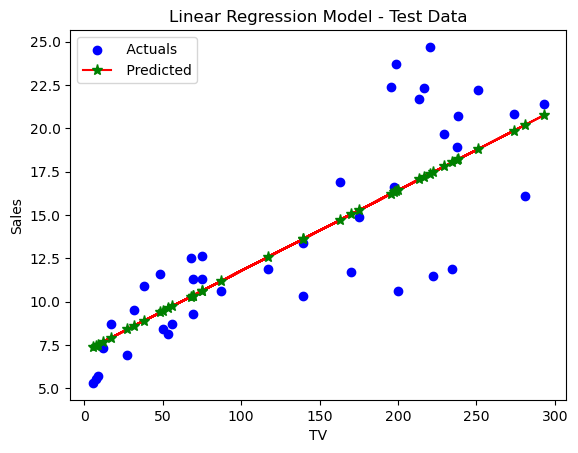

In [41]:
plt.scatter(X_test, y_test, color = 'blue', label =' Actuals')
plt.plot(X_test, y_pred_test, color = 'red', label =' Predicted', marker = '*',
         mfc = 'green', mec = 'green', ms = 8)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Linear Regression Model - Test Data')
plt.legend(loc =  'upper left')
plt.show()

In [43]:
res_df =  pd.DataFrame({
    'Actuals': y_test, 
    'Predicted': y_pred_test,
    'Error': y_test - y_pred_test
})

In [44]:
res_df

,Actuals,Predicted,Error
95,16.9,14.717944,2.182056
15,22.4,16.211548,6.188452
30,21.4,20.748197,0.651803
158,7.3,7.664036,-0.364036
128,24.7,17.370139,7.329861
115,12.6,10.614021,1.985979
69,22.3,17.207285,5.092715
170,8.4,9.446125,-1.046125
174,11.5,17.467851,-5.967851
45,14.9,15.266995,-0.366995


In [50]:
lin_reg.predict([[111]])

C:\Users\SLP12264\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12.28443887])

In [51]:
# Find models predictin on training data

y_pred_train =  lin_reg.predict(X_train)

In [52]:
# Printing the performance metrics 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [53]:
mse_train =  mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train =  r2_score(y_train, y_pred_train)

mse_test =  mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test =  r2_score(y_test, y_pred_test)


print('Performance on Train Data')
print('----------------------------------')
print(f'Mean Squared Error- Train : {mse_train:.4f}')
print(f'Root Mean Squared Error- Train : {rmse_train:.4f}')
print(f'Mean Absolute Error- Train : {mae_train:.4f}')
print(f'R Squared- Train : {r2_train:.4f}')

print('Performance on Test Data')
print('----------------------------------')
print(f'Mean Squared Error- Test : {mse_test:.4f}')
print(f'Root Mean Squared Error- Test : {rmse_test:.4f}')
print(f'Mean Absolute Error- Test : {mae_test:.4f}')
print(f'R Squared- Test : {r2_test:.4f}')

Performance on Train Data
----------------------------------
Mean Squared Error- Train : 10.6036
Root Mean Squared Error- Train : 3.2563
Mean Absolute Error- Train : 2.5831
R Squared- Train : 0.5912
Performance on Test Data
----------------------------------
Mean Squared Error- Test : 10.2047
Root Mean Squared Error- Test : 3.1945
Mean Absolute Error- Test : 2.4444
R Squared- Test : 0.6767


# Overfitting and Underfitting
When developing machine learning models, achieving the right balance between the models complexity and simplicity is crucial. This balance is covered in the concepts of overfitting and underfitting.

**Overfitting**
- Overfitting occurs when a model learns the noise and details in the training data too well to the extent that it negatively impacts its performance on new unseen data.
- Sign: High accuracy on training data but poor accuracy on test data.
- Cause: Model is too complex (too many parameters).
  
**Underfitting**
- Underfitting happens when a model is too simple to capture the underlying pattern of the data.
- Sign: Poor accuracy on both training and test data.
- Cause: Model is too simple (too few parameters).
  
**Bias-Variance Tradeoff**
- Bias: Error due to overly simplistic assumptions in the learning algorithm. High bias can cause underfitting.
- Variance: Error due to excessive complexity in the learning algorithm. High variance can cause overfitting.


**Tradeoff**
- Low Bias & High Variance: Model fits the training data very well but may fail to generalize (overfitting).
- High Bias & Low Variance: Model does not fit the training data well and misses the underlying trend (underfitting).
- Optimal Tradeoff: Finding a balance where the model performs well on both training and test data, minimizing overall error.
  
Understanding and managing the bias-variance tradeoff is key to building models that generalize well to unseen data.

In [57]:
mse_train = 0.5
mse_test = 0.6
r2_train = 0.6
r2_test =0.6

In [58]:
# Check for overfitting and underfitting
if mse_train < mse_test or r2_train> r2_test:
    if abs(r2_train- r2_test) > 0.05:
        print('Model may be overfitting to the training data')
    else:
        print('model performs reasoanbly well, but check for slight overfitting')        
elif mse_train > mse_test and r2_train< r2_test:
     print('model may be underfitting, consider increasing model complexity')  
else:
     print('model balanced fit for both training and testing')  

    

model performs reasoanbly well, but check for slight overfitting


In [59]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
mse_train = mean_squared_error(y_train, xgbr.predict(X_train))
mse_test = mean_squared_error(y_test, xgbr.predict(X_test))
r2_train = r2_score(y_train, xgbr.predict(X_train))
r2_test = r2_score(y_test, xgbr.predict(X_test))


print('Performance on Train Data')
print('----------------------------------')
print(f'Mean Squared Error- Train : {mse_train:.4f}')
print(f'Root Mean Squared Error- Train : {rmse_train:.4f}')
print(f'R Squared- Train : {r2_train:.4f}')

print('Performance on Test Data')
print('----------------------------------')
print(f'Mean Squared Error- Test : {mse_test:.4f}')
print(f'Root Mean Squared Error- Test : {rmse_test:.4f}')
print(f'R Squared- Test : {r2_test:.4f}')

# Check for overfitting and underfitting
if mse_train < mse_test or r2_train> r2_test:
    if abs(r2_train- r2_test) > 0.05:
        print('Model may be overfitting to the training data')
    else:
        print('model performs reasoanbly well, but check for slight overfitting')        
elif mse_train > mse_test and r2_train< r2_test:
     print('model may be underfitting, consider increasing model complexity')  
else:
     print('model balanced fit for both training and testing')  

Performance on Train Data
----------------------------------
Mean Squared Error- Train : 0.3874
Root Mean Squared Error- Train : 3.2563
R Squared- Train : 0.9851
Performance on Test Data
----------------------------------
Mean Squared Error- Test : 13.6838
Root Mean Squared Error- Test : 3.1945
R Squared- Test : 0.5665
Model may be overfitting to the training data
